# Sentiment Analysis of Apple Products through twitter


## Data Facts and Import

In [63]:
from textblob import TextBlob

In [64]:
import tweepy

In [65]:
from wordcloud import WordCloud

In [66]:
import pandas as pd

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import re
plt.style.use('fivethirtyeight')

In [68]:
reviews = pd.read_csv('C:/Users/adisa/Desktop/Qtech/apple.csv')

In [69]:
reviews.shape

(1630, 2)

In [70]:
reviews.head()

,text,sentiment
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1
1,What Happened To Apple Inc? http://t.co/FJEX...,0
2,Thank u @apple I can now compile all of the pi...,1
3,The oddly uplifting story of the Apple co-foun...,0
4,@apple can i exchange my iphone for a differen...,0


In [71]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1630 non-null   object
 1   sentiment  1630 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 25.6+ KB


In [72]:
reviews.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sentiment,1630.0,-0.333129,0.63076,-1.0,-1.0,0.0,0.0,1.0


## Data Cleaning / EDA

In [73]:
count = reviews.isnull().sum().sort_values(ascending=False)
percentage = ((reviews.isnull().sum()/len(reviews*100)).sort_values(ascending=False))
missing_data = pd.concat([count, percentage], axis = 1) 
keys = [('Count', 'Percentage')]

print('Count and percentage of missing values of the columns:')

missing_data

Count and percentage of missing values of the columns:


,0,1
text,0,0.0
sentiment,0,0.0


Percentage for default 

 0    49.141
-1    42.086
 1     8.773
Name: sentiment, dtype: float64


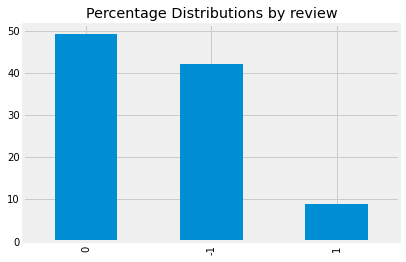

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for default \n')
print(round(reviews.sentiment.value_counts(normalize=True)*100,3))
round(reviews.sentiment.value_counts(normalize=True)*100,3).plot(kind='bar')
plt.title('Percentage Distributions by review')
plt.show()

## Data Cleaning

In [75]:
#Apply first level cleaning
import re
import string

def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
cleaned1 = lambda x: text_clean_1(x)

In [76]:
reviews['cleaned_review']= pd.DataFrame(reviews.text.apply(cleaned1))
reviews.head()

,text,sentiment,cleaned_review
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1,wow yall needa step it up apple rt heynyla mus...
1,What Happened To Apple Inc? http://t.co/FJEX...,0,what happened to apple inc aapl apple mone...
2,Thank u @apple I can now compile all of the pi...,1,thank u apple i can now compile all of the pic...
3,The oddly uplifting story of the Apple co-foun...,0,the oddly uplifting story of the apple cofound...
4,@apple can i exchange my iphone for a differen...,0,apple can i exchange my iphone for a different...


In [77]:
#Apply second level of cleaning
def text_clean_2(text):
    text = re.sub('[''""]','',text)
    text = re.sub('\n', '', text)
    return text

cleaned2 = lambda x: text_clean_2(x)

In [78]:
reviews['cleaned_review_new']= pd.DataFrame(reviews['cleaned_review'].apply(cleaned2))
reviews.head(10)

,text,sentiment,cleaned_review,cleaned_review_new
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1,wow yall needa step it up apple rt heynyla mus...,wow yall needa step it up apple rt heynyla mus...
1,What Happened To Apple Inc? http://t.co/FJEX...,0,what happened to apple inc aapl apple mone...,what happened to apple inc aapl apple mone...
2,Thank u @apple I can now compile all of the pi...,1,thank u apple i can now compile all of the pic...,thank u apple i can now compile all of the pic...
3,The oddly uplifting story of the Apple co-foun...,0,the oddly uplifting story of the apple cofound...,the oddly uplifting story of the apple cofound...
4,@apple can i exchange my iphone for a differen...,0,apple can i exchange my iphone for a different...,apple can i exchange my iphone for a different...
5,RT @JPDesloges: Apple Acted Unfairly In Suppre...,-1,rt jpdesloges apple acted unfairly in suppress...,rt jpdesloges apple acted unfairly in suppress...
6,Let's not forget that press effects stock @App...,0,lets not forget that press effects stock apple...,lets not forget that press effects stock apple...
7,Apple Inc. Deleted Songs From Rival Services F...,-1,apple inc deleted songs from rival services fr...,apple inc deleted songs from rival services fr...
8,@TeamCavuto @Apple They're staging a die in ar...,0,teamcavuto apple theyre staging a die in ar an...,teamcavuto apple theyre staging a die in ar an...
9,Happy Monday! My camera on my fancy @Apple #iP...,-1,happy monday my camera on my fancy apple sudd...,happy monday my camera on my fancy apple sudd...


## Model Training

In [79]:
from sklearn.model_selection import train_test_split

Independent_var = reviews.cleaned_review_new
Dependent_var = reviews.sentiment

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.1, random_state = 125)

print('IV train:',len(IV_train))
print('IV test :',len(IV_test))
print('DV train:',len(DV_train))
print('DV test :',len(DV_test))

IV train: 1467
IV test : 163
DV train: 1467
DV test : 163


In [80]:
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

Cvec = CountVectorizer
clf2 = LogisticRegression(solver = "lbfgs")

from sklearn.pipeline import Pipeline

In [91]:
model = Pipeline([('vectorizer', Cvec()),('classifier',clf2)])

In [92]:
model.fit(IV_train, DV_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', LogisticRegression())])

In [93]:
from sklearn.metrics import confusion_matrix

In [96]:
prediction = model.predict(IV_test)

In [97]:
confusion_matrix(predictions, DV_test)

array([[57,  9,  2],
       [10, 76,  4],
       [ 0,  0,  5]], dtype=int64)

## Model prediction

In [101]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy :", accuracy_score(predictions, DV_test))
print("Precision :", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall :", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy : 0.8466257668711656
Precision : 0.8625402562986386
Recall : 0.8466257668711656


## Trying new reviews

In [119]:
example = ["product is very bad"]
result = model.predict(example)

print(result)

[-1]


In [120]:
example = ["absolutely love apple products"]
result = model.predict(example)

print(result)

[1]


In [121]:
example = ["iphone 12 is out in the market"]
result = model.predict(example)

print(result)

[0]


In [128]:
example = ["i love the new iphone"]
result = model.predict(example)

print(result)

[0]
